In [2]:
import pandas as pd
import autograd.numpy as np
from autograd import grad, jacobian
from scipy.stats import t
from gc_prop_calculation import y_pred_cal

In [3]:
df1 = pd.read_excel('data/excel_sp/Train_Tc.xlsx')
df2 = pd.read_excel('data/excel_sp/Test_Tc.xlsx')

In [4]:
df_concatenated = pd.concat([df1, df2], ignore_index=True)  

df_concatenated_filtered = df_concatenated.loc[:, (df_concatenated != 0).any(axis=0)]

df1_aft = df_concatenated_filtered.iloc[:len(df1)]  
df2_aft = df_concatenated_filtered.iloc[len(df1):] 

In [5]:
# df_raw = pd.read_excel('data/new_excels/Tc.xlsx')
# # extract target values
# df_target = df_raw['Const_Value']
# y = df_target.to_numpy()
# # extract all groups
# df_grp = df_raw.loc[:,'CH3':]
# df_grp = df_grp.iloc[:,:220+130+74]
# G = df_grp.to_numpy()
# # G = df_grp.loc[:, (df_grp != 0).any(axis=0)].to_numpy()

In [6]:
prop_tag = 'Tc'

In [7]:
df_raw = df_concatenated
# extract target values
df_target = df_raw['Const_Value']
y = df_target.to_numpy()
# extract all groups
df_grp = df_raw.loc[:,'CH3':]
G = df_grp.to_numpy()
# G = df_grp.loc[:, (df_grp != 0).any(axis=0)].to_numpy()

In [8]:
df_raw = df1_aft
# extract target values
df_target = df_raw['Const_Value']
y_tr = df_target.to_numpy()
# extract all groups
df_grp = df_raw.loc[:,'CH3':]
G_tr = df_grp.to_numpy()
# G = df_grp.loc[:, (df_grp != 0).any(axis=0)].to_numpy()

In [9]:
params_raw = pd.read_excel('data/theta_'+prop_tag+'.xlsx')

shape = G.shape
a,b = shape

theta_lm = params_raw.to_numpy().reshape(b+1,)
# theta_lm = params_raw['Values'].to_numpy().reshape(b+3,) #for omega

In [655]:
y_pred_lm = y_pred_cal(G, theta_lm[0], theta_lm[1:], 0, 0, prop_tag) 

analysis

In [10]:
def model_cost(theta, y):
    
    y_pred = y_pred_cal(G, theta[0], theta[1:], 0, 0, prop_tag)
#     y_pred = y_pred_cal(G, [theta[0], theta[1], theta[2]], theta[3:], 0, 0, prop_tag) 
    
    error = y - y_pred
    return error

jacobian_matrix = jacobian(model_cost)
jacobian_value = jacobian_matrix(theta_lm, y)
J = jacobian_value

In [11]:
jacobian_value.shape

(1868, 425)

In [12]:
y_pred_lm = y_pred_cal(G, theta_lm[0], theta_lm[1:], 0, 0, prop_tag)
# y_pred_lm = y_pred_cal(G, [theta_lm[0], theta_lm[1], theta_lm[2]], theta_lm[3:], 0, 0, prop_tag) 

resd = y - y_pred_lm

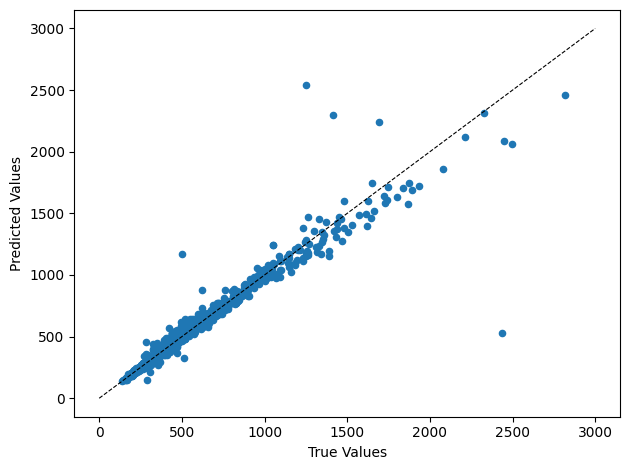

In [13]:
import matplotlib.pyplot as plt
# plot
plt.scatter(y,y_pred_lm,s=20)
plt.plot([0, 3000], [0, 3000], color='black', linestyle='--',linewidth=0.8)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# plt.xlim(0, 3)
# plt.ylim(0, 3)
plt.tight_layout()

# plt.savefig('Parity Plot of y_lm_tog and y_true for '+prop_tag+'.pdf')
plt.show()

In [14]:
s=np.matmul(np.transpose(resd),resd)/(a-b-1)
print(s)

6471.642294596286


In [15]:
p_cov=np.linalg.pinv(np.matmul(np.transpose(J),J))*s
print(p_cov)

[[ 8.62759731e+02 -4.31248554e+02 -1.01947456e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.31248554e+02  2.29032069e+02 -1.05128789e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.01947456e-01 -1.05128789e+00  2.74908139e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [16]:
param_se = np.sqrt(np.diag(p_cov))
print(param_se)

[2.93727719e+01 1.51338055e+01 5.24316831e-01 1.69741588e+01
 3.37133974e+01 2.40078087e+01 3.87089094e+01 3.87946028e+01
 6.24564391e+01 9.13708957e+01 4.88311092e+01 8.07807903e+01
            nan 2.41784258e+01 3.35870173e+01 5.73298835e+00
 5.25623401e+01 2.72672733e+01 1.01164082e+02 3.57392519e+01
 1.06140109e+01 1.42505331e+01 3.92777202e+01 4.91707915e+01
 2.27455191e+01 4.61788326e+01 4.46595131e+01 8.19348631e+01
            nan 1.60574694e+01 1.77053292e+01 1.85639914e+01
 2.96506962e+01 2.62583156e+01 1.40714498e+01 5.63530569e+01
 1.02742543e+02 3.11170386e+01 2.10395726e+01 2.34653515e+01
 2.12692309e+01 1.00173549e+01 2.92803656e+01 5.19083224e+01
 2.61895506e+01 1.65636145e+01 1.57850363e-11 6.07164842e+01
 2.46517283e+01 1.84649703e+01 6.86893511e+00 3.50658031e+01
 4.51332738e+01 2.14207124e+01 2.06178589e+01 3.20779944e+01
 5.05503668e+01 4.50046338e+01 1.73084533e+01 8.31830099e+01
 2.10673559e+01 2.84694146e+01 2.34712186e+01 5.97786740e+01
 4.62572131e+01 6.595804

D:\Users\49332\anaconda3\envs\test\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in sqrt
  return f_raw(*args, **kwargs)


In [17]:
p_cor = p_cov/np.matmul(np.transpose(param_se),param_se)

In [18]:
tcr = t.ppf(1-0.025,a-b-1)
tcr

1.961609326502473

In [19]:
p95_lower = theta_lm - tcr * param_se
p95_upper = theta_lm + tcr * param_se

p95 = np.vstack((p95_lower, p95_upper)).T
print(p95)

[[-4.08593056e+01  7.43765012e+01]
 [ 3.76572361e+01  9.70304641e+01]
 [ 5.58960811e+01  5.79530907e+01]
 [ 5.21484754e+00  7.18081841e+01]
 [-5.55616626e+01  7.67033670e+01]
 [ 5.70718908e+01  1.51259774e+02]
 [ 1.17165821e+00  1.53035174e+02]
 [ 9.05294400e+00  1.61252653e+02]
 [-5.14098689e+01  1.93620398e+02]
 [-1.22614577e+02  2.35853425e+02]
 [ 3.97349929e+01  2.31310111e+02]
 [-1.89066497e+01  2.98014054e+02]
 [            nan             nan]
 [ 2.94801643e+01  1.24337415e+02]
 [ 1.26218234e+00  1.33031395e+02]
 [ 2.93433279e+01  5.18350947e+01]
 [-6.75280700e+01  1.38685483e+02]
 [-1.67387874e+01  9.02366878e+01]
 [-1.47030773e+02  2.49858039e+02]
 [-3.39315587e+01  1.06281341e+02]
 [ 7.61668277e+01  1.17807913e+02]
 [ 5.73222721e+01  1.13230230e+02]
 [-6.14876139e+00  1.47946323e+02]
 [-3.65218018e+01  1.56385965e+02]
 [ 9.50272417e+01  1.84262887e+02]
 [ 2.77810984e+01  2.08950756e+02]
 [ 3.09868077e+01  2.06195843e+02]
 [-4.70538458e+01  2.74394537e+02]
 [            nan   

In [20]:
y_cov = np.matmul(np.matmul(J, p_cov),np.transpose(J))

In [21]:
y_sigma = np.sqrt(np.abs(np.diag(y_cov)))

print(y_sigma)

[30.38149895 41.18285105 38.56919962 ... 20.85265952 24.46930973
 13.58437134]


In [22]:
y95_lower = y_pred_lm - y_sigma * tcr  
y95_upper = y_pred_lm + y_sigma * tcr

y95 = np.vstack((y95_lower, y95_upper)).T

print(y95)

[[285.92944343 405.12270681]
 [348.15523949 509.72456892]
 [335.89832752 487.21373092]
 ...
 [233.57326281 315.38280562]
 [311.36085925 407.35931161]
 [236.33391127 289.6283703 ]]


parity plot for three sets with uncertainty

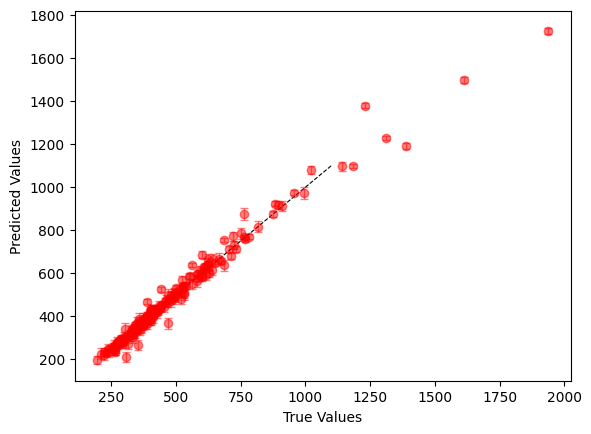

In [546]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

errors = np.sqrt(np.abs(np.diag(y_cov)))* tcr 

# y = y*1000 # for Vc dataset only

plt.errorbar(y, y_pred_lm, yerr=errors,fmt='o', color='red', ecolor='red', elinewidth=1, capsize=3, alpha=0.5)

plt.plot([300, 1100], [300, 1100], color='black', linestyle='--',linewidth=0.8)


# plt.legend()

plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.savefig('linear/'+prop_tag+'_1.pdf')

plt.show()

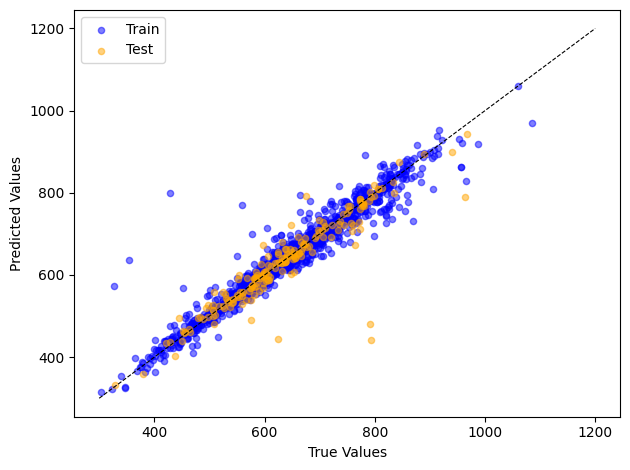

In [643]:
y_train = df_target.to_numpy()

plt.scatter(y_train, y_pred_train, color='blue',s=20, alpha=0.5, label='Train')
# plt.scatter(y_val, y_pred_val, color='purple', s=20, alpha=0.5, label='Validation')
plt.scatter(y_test, y_pred_te, color='orange',s=20, alpha=0.5, label='Test')

plt.plot([300, 1200], [300, 1200], color='black', linestyle='--',linewidth=0.8)

# plt.xlim(0, 100)
# plt.ylim(0, 100)

plt.legend(loc='upper left') 

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.tight_layout()

plt.savefig('linear/'+prop_tag+'_1.pdf')

plt.show()

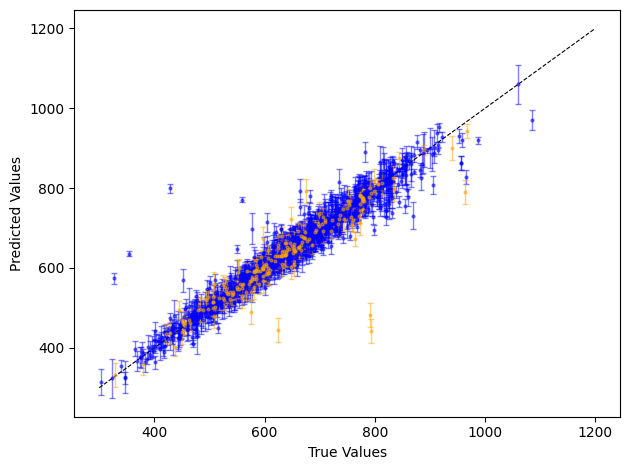

In [645]:
plt.errorbar(y_train, y_pred_train, yerr=errors_tr, fmt='o', color='blue', markersize=2,ecolor='blue', elinewidth=1, capsize=2, alpha=0.5, label='Test')
# plt.errorbar(y_val, y_pred_val, yerr=errors_va, fmt='o', color='purple', markersize=2,ecolor='purple', elinewidth=1, capsize=2, alpha=0.5, label='Test')
plt.errorbar(y_test, y_pred_te, yerr=errors_te, fmt='o', color='orange', markersize=2,ecolor='orange', elinewidth=1, capsize=2, alpha=0.5, label='Test')

plt.plot([300, 1200], [300, 1200], color='black', linestyle='--',linewidth=0.8)

# plt.xlim(0, 100)
# plt.ylim(0, 100)

# plt.legend()

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.tight_layout()

plt.savefig('linear/'+prop_tag+'_2.pdf')

plt.show()